## Machine Learning with scikit-learn

We go through an example of building a Logistic Regression model of the titanic dataset.

Download the dataset here: https://www.openml.org/d/40945 (choose CSV)

We will be using `pandas` for data manipulation, `sklearn` for machine learning models and `matplotlib` for visualization.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df = iris_df[iris_df['target'] >= 1] # use only 2 classes
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [4]:
from matplotlib import pyplot as plt

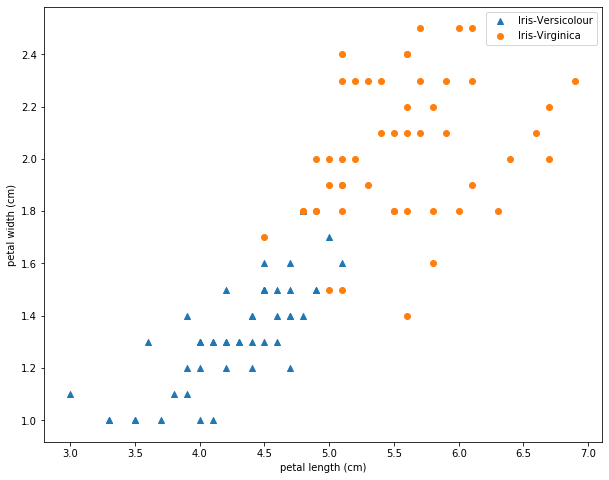

In [5]:
# GRAPH THE DATA
plt.figure(figsize=(10, 8))
xlabel, ylabel = "petal length (cm)", "petal width (cm)"
plt.xlabel(xlabel)
plt.ylabel(ylabel)
class0 = iris_df[iris_df["target"] == 1]
class1 = iris_df[iris_df["target"] == 2]
plt.scatter(class0[xlabel], class0[ylabel], marker='^', label="Iris-Versicolour")
plt.scatter(class1[xlabel], class1[ylabel], label="Iris-Virginica")
plt.legend()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# BUILD MODEL
X = iris_df[[xlabel, ylabel]].values
y = iris_df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
iris_model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [8]:
print(iris_model.coef_, iris_model.intercept_)

[[2.47340195 2.15921638]] [-15.59225395]


In [9]:
# MAKE SINGLE PREDICTION
print("datapoint:", X_test[0])
print("target:", y_test[0])
print("prediction:", iris_model.predict([X_test[0]]))

datapoint: [5.8 1.8]
target: 2
prediction: [2]


In [10]:
# PREDICT ON ENTIRE TEST SET
y_predict = iris_model.predict(X_test)
pd.DataFrame({xlabel: X_test[:, 0], ylabel: X_test[:, 1], "target": y_test, "prediction": y_predict})

,petal length (cm),petal width (cm),target,prediction
0,5.8,1.8,2,2
1,4.2,1.3,1,1
2,4.5,1.5,1,1
3,4.6,1.5,1,1
4,4.0,1.3,1,1
5,4.2,1.2,1,1
6,4.9,1.8,2,2
7,4.5,1.3,1,1
8,5.9,2.1,2,2
9,5.0,1.5,2,2


In [11]:
# CALCULATE SCORE ON ENTIRE TEST SET
print(iris_model.score(X_test, y_test))

0.96


# Your Turn!

Feel free to approach any exercise first.


Here are the general steps to follow when building a model:

1. Load data, build DataFrame
2. Use `train_test_split` to create training and test set
3. For each model:
    - Build model with the train set (`fit` method)
    - Score with the test set (`score` method)

## Exercise 1

Use all four features (instead of just pedal length and pedal width) in the model for the iris dataset.

## Exercise 2

Load another model from sklearn and compare the score with linear regression on the iris dataset.

**Don't run `train_test_split` again. Use the same train and test sets for all the algorithms.**

Here are the docs & import statements for the other regression models:

* [Desision tree for classification](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `from sklearn.tree import DecisionTreeClassifier`
* [Random forest for classification](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): `from sklearn.ensemble import RandomForestClassifier`
* [Neural network for classification](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPClassifier): `from sklearn.neural_network import MLPClassifier`

Follow the syntax of the `LinearRegression` model. The `fit`, `predict` and `score` methods are the same!

## Exercise 3

Try building a model for the boston regression dataset.

Here's the import statement: `from sklearn.datasets import load_boston`.

Follow the same syntax as with the `load_iris` function.

Here's the docs & import statements for the classification models:

* [Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): `from sklearn.linear_model import LinearRegression`
* [Desision tree for regression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html): `from sklearn.tree import DecisionTreeRegressor`
* [Random forest for regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html): `from sklearn.ensemble import RandomForestRegressor`
* [Neural network for regression](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor): `from sklearn.neural_network import MLPRegressor`

## Even more

Try building models for other [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) or some [real world datasets](https://scikit-learn.org/stable/datasets/real_world.html). Or find a fun challenge on [kaggle.com](https://www.kaggle.com/).